In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

import analysis_utils as utils
from scipy.optimize import curve_fit

import importlib
import h5py

yale_colors = ['#00356b', '#286dc0', '#63aaff', '#4a4a4a']
utils.load_plotting_setting()

In [387]:
importlib.reload(utils)

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:430: SyntaxWarning: invalid escape sequence '\s'
  
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:432: SyntaxWarning: invalid escape sequence '\s'
  ax.errorbar(bcs[i], hhs[i], yerr=np.sqrt(hhs[i]), fmt='o', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:437: SyntaxWarning: invalid escape sequence '\s'
  
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:439: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(title, fontsize=16)


<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py'>

In [335]:
amp2kev = 4881.810673408754
c_mv = 4.872e-08

In [3]:
folder = r'/Users/yuhan/work/nanospheres/data/dm_data'
dataset = r'20241008_short_timetrace'
combined_path = os.path.join(folder, dataset, '*.hdf5')
data_files = sorted(glob.glob(combined_path), key=os.path.getmtime)

In [5]:
# Go through the files once and calculate variance for each window
window_length_long = 40000  # 10 ms analysis window
window_length_short = 20000  # 5 ms analysis window

var_all_long = np.empty(shape=(120, 500))
var_all_short = np.empty(shape=(120, 1000))

for i, file in enumerate(data_files):    
    f = h5py.File(file, "r")
    zz = f['channel_d'][:] / 1e3
    fs = int(np.ceil(1 / f['channel_d'].attrs['delta_t']))

    zz_bp = utils.bandpass_filtered(zz, fs, 40000, 100000)
    
    zz_bp_long = np.reshape(zz_bp, (int(zz_bp.size / window_length_long), window_length_long))
    var_all_long[i] = np.var(zz_bp_long, axis=1)
    
    zz_bp_short = np.reshape(zz, (int(zz_bp.size / window_length_short), window_length_short))
    var_all_short[i] = np.var(zz_bp_short, axis=1)
    
q1, q2, q3 = np.quantile(var_all_long.flatten(), [0.25, 0.5, 0.75])
var_thr_long = q2 + 1.5 * (q3 - q1)

q1, q2, q3 = np.quantile(var_all_short.flatten(), [0.25, 0.5, 0.75])
var_thr_short = q2 + 1.5 * (q3 - q1)

In [339]:
bins = np.arange(0, 5, 0.01)
bc = 0.5 * (bins[:-1] + bins[1:])

# For 10 ms window
hh_all = np.empty(shape=(len(data_files), 500, bc.size))
temp_all = np.empty(shape=(len(data_files), 500))

for i, file in enumerate(data_files):
    print(file)
    
    f = h5py.File(file, "r")
    zz = f['channel_d'][:] / 1e3
    dtt = f['channel_d'].attrs['delta_t']
    fs = int(np.ceil(1 / f['channel_d'].attrs['delta_t']))

    zz_bp = utils.bandpass_filtered(zz, fs, 40000, 100000)
    
    # Long window
    zz_bp_long = np.reshape(zz_bp, (int(zz_bp.size / window_length_long), window_length_long))
    
    for j, zz in enumerate(zz_bp_long):
        amp, amp_lp, temp = utils.recon_force(dtt, zz, c_mv)
        
        hh_all[i, j] = np.histogram(amp_lp[700:-500], bins=bins)[0]
        temp_all[i, j] = temp

/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_0.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_1.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_2.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_3.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_4.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_5.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_6.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_7.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_8.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_9.hdf5
/Users/yuhan/work/nanospheres/data/dm_da

/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_85.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_86.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_87.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_88.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_89.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_90.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_91.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_92.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_93.hdf5
/Users/yuhan/work/nanospheres/data/dm_data/20241008_short_timetrace/20241008_streaming_d_94.hdf5
/Users/yuhan/work/nanospheres/

Text(0.5, -0.01, 'Reconstructed amplitude (MeV/c)')

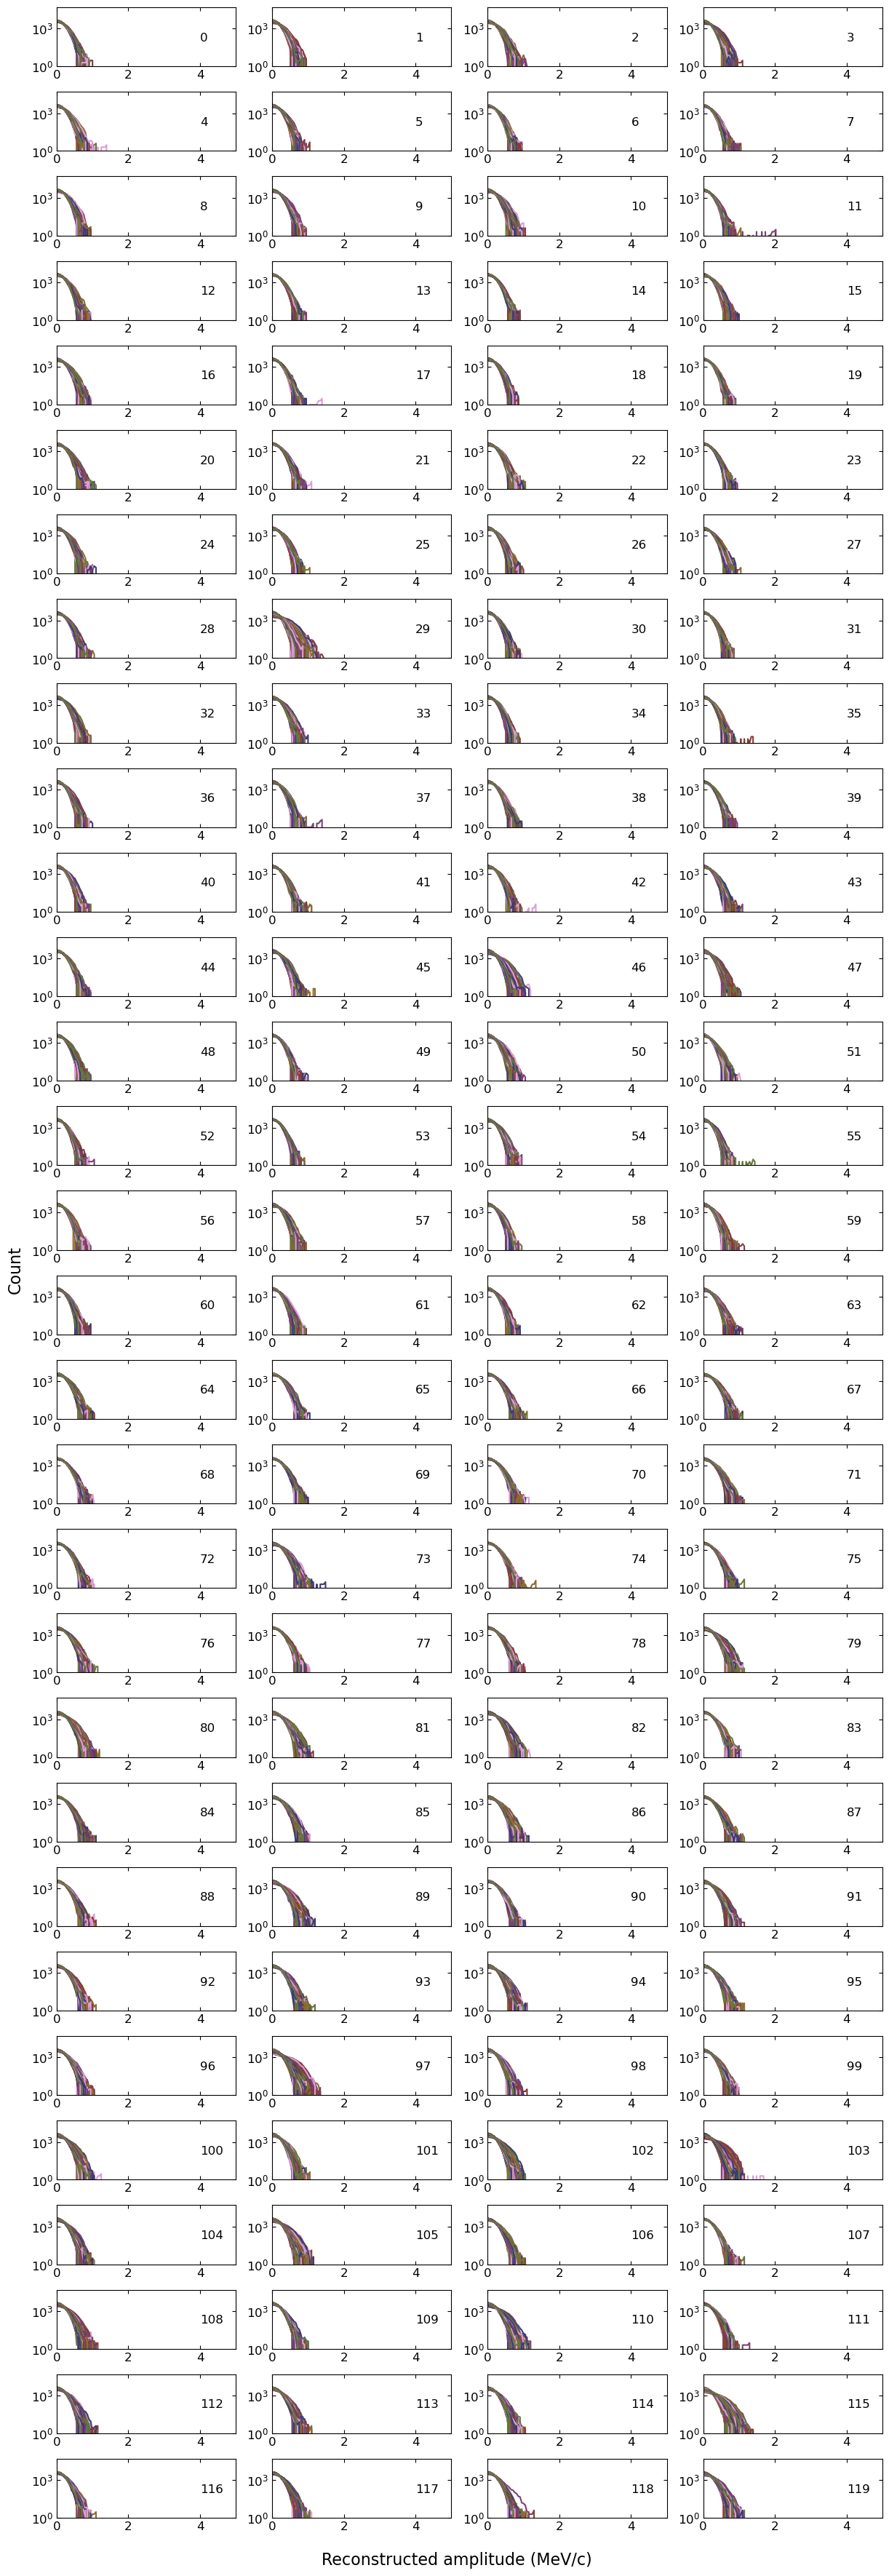

In [377]:
fig, axes = plt.subplots(30, 4, figsize=(12, 35))

ax = axes.flatten()
for i, hh_file in enumerate(hh_all):
    for j in range(hh_all.shape[1]):
        ax[i].plot(bc*amp2kev/1000, hh_all[i, j])
    
    ax[i].text(4, 1e2, f'{i}', fontsize=12)
    ax[i].set_ylim(1, 5e4)
    ax[i].set_xlim(0, 5)
    ax[i].set_yscale('log')
    
fig.tight_layout()
fig.supylabel('Count', fontsize=16, x=-0.015, y=0.5)
fig.supxlabel('Reconstructed amplitude (MeV/c)', fontsize=16, x=0.5, y=-0.01) 


In [357]:
q1, q2, q3 = np.quantile(temp_all.flatten(), [0.25, 0.5, 0.75])
temp_thr = q2 + 1.5 * (q3 - q1)

hh_cold = hh_all[temp_all < temp_thr]

In [423]:
print(f'Cold data: {np.sum(temp_all < temp_thr) / temp_all.size * 100:.2f}%')

Cold data: 90.25%


<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_52202/2920561229.py:14: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, utils.gauss(xx, *gp), 'r:', label=f'Gaussian fit, $\sigma$={gp[2]*1000:.1f} keV/c')


Text(0, 0.5, 'Count')

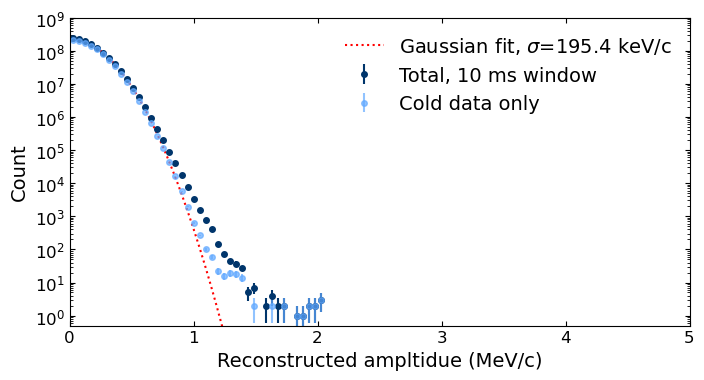

In [605]:
hh_all_sum = np.sum(np.sum(hh_all, axis=0), axis=0)
hh_cold_sum = np.sum(hh_cold, axis=0)

# Gaussian fit
good_idx = hh_all_sum > 0
gp, gcov = curve_fit(utils.gauss, bc[good_idx]*amp2kev/1000, hh_all_sum[good_idx], p0=[np.max(hh_all_sum), 0, 1], maxfev=10000)

fig, ax = plt.subplots(figsize=(8, 4))
ax.errorbar(bc*amp2kev/1000, hh_all_sum, np.sqrt(hh_all_sum), fmt='o', markersize=4, color=yale_colors[0], label='Total, 10 ms window')
ax.errorbar(bc*amp2kev/1000, hh_cold_sum, np.sqrt(hh_cold_sum), fmt='o', markersize=4, color=yale_colors[2], label='Cold data only', alpha=0.7)


xx = np.linspace(0, 1.5, 200)
ax.plot(xx, utils.gauss(xx, *gp), 'r:', label=f'Gaussian fit, $\sigma$={gp[2]*1000:.1f} keV/c')

ax.set_xlim(0, 5)
ax.set_ylim(0.5, 1e9)
ax.set_yscale('log')
ax.legend(frameon=False, fontsize=14)
ax.set_xlabel('Reconstructed ampltidue (MeV/c)')
ax.set_ylabel('Count')

In [415]:
# Find all the files that contribute to the non_gaussian tail
events_idx = []
cold_events_idx = []
threshold = 1.1

for i, hh_file in enumerate(hh_all):
    for j, hh in enumerate(hh_file):
        if np.sum(hh[bc*amp2kev/1000 > threshold]) > 0:
            events_idx.append(np.array([i, j]))
            
            if temp_all[i, j] < temp_thr:
                cold_events_idx.append(np.array([i, j]))

In [404]:
bins = np.arange(0, 5, 0.01)
bc = 0.5 * (bins[:-1] + bins[1:])

def plot_hist_events(file_idx, idx):
    file = data_files[file_idx]
    f = h5py.File(file, "r")
    zz = f['channel_d'][:] / 1e3
    dtt = f['channel_d'].attrs['delta_t']
    fs = int(np.ceil(1 / f['channel_d'].attrs['delta_t']))

    zz_bp = utils.bandpass_filtered(zz, fs, 40000, 100000)

    # Long window
    zz_bp_long = np.reshape(zz_bp, (int(zz_bp.size / window_length_long), window_length_long))
    
    amp, amp_lp, temp = utils.recon_force(dtt, zz_bp_long[idx], c_mv)
    hh = np.histogram(amp_lp[500:-500], bins=bins)[0]
    
    fig, ax = plt.subplots(1, 2, figsize=(6, 2))
    ax[0].errorbar(bc*amp2kev/1000, hh, np.sqrt(hh), fmt='o', markersize=2)
    ax[0].set_yscale('log')
    ax[0].set_xlim(0, 2.5)
    ax[0].set_ylim(1, 5e4)
    ax[0].set_xlabel('Reconstructed amp. (MeV/c)', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)

    ax[1].plot(2e-7*1e6*np.arange(0, amp_lp[500:-500].size), amp_lp[500:-500]*amp2kev/1000, color='grey')
    ax[1].set_ylim(-2, 2)
    ax[1].set_xlabel('Time ($\mu s$)', fontsize=12)
    ax[1].set_ylabel('Amp. (MeV/c)', fontsize=12)
    
    fig.suptitle(f'Event (file_{file_idx}, window_{idx})')
    fig.tight_layout()
    
    return amp_lp, hh, fig, ax

<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_52202/3968736663.py:29: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel('Time ($\mu s$)', fontsize=12)


Plotting all events larger than 1.2 MeV in the cold data

In [416]:
len(cold_events_idx)

25

/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_52202/3968736663.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(6, 2))


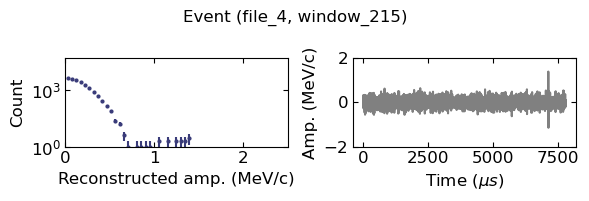

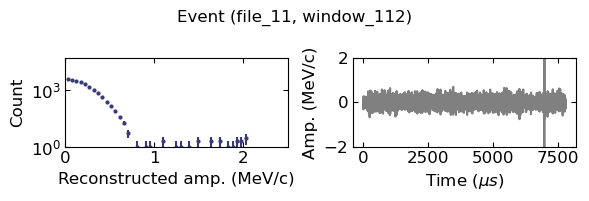

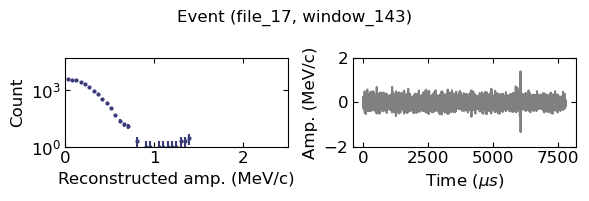

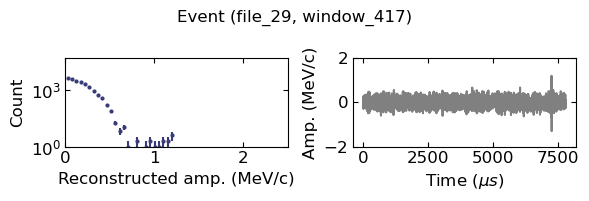

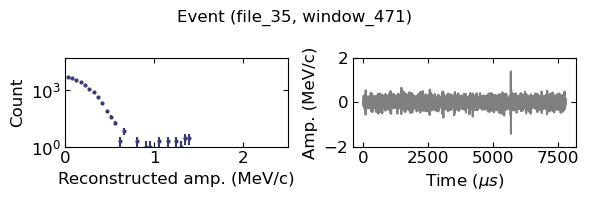

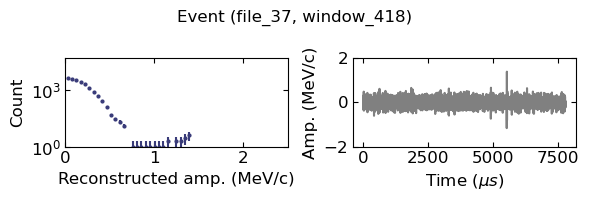

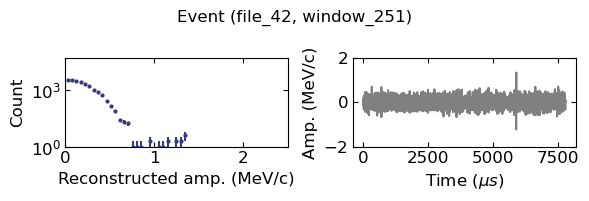

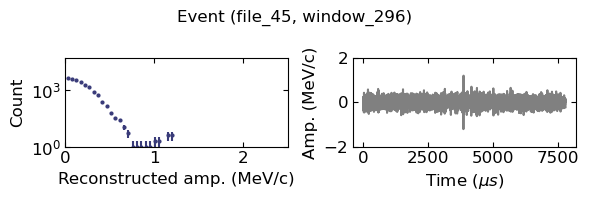

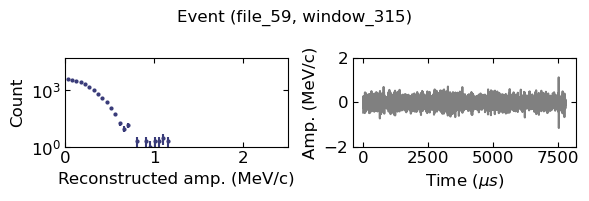

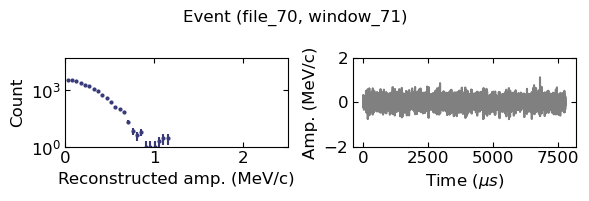

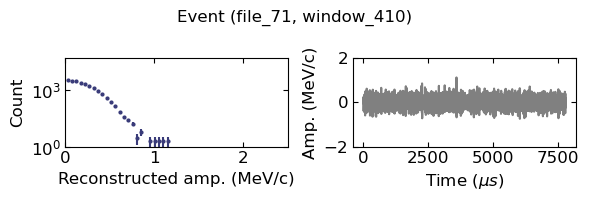

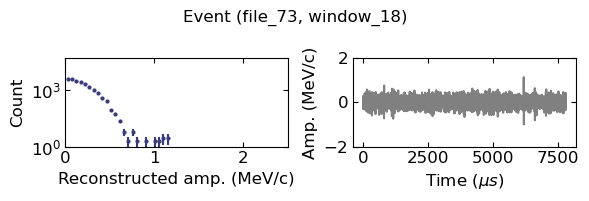

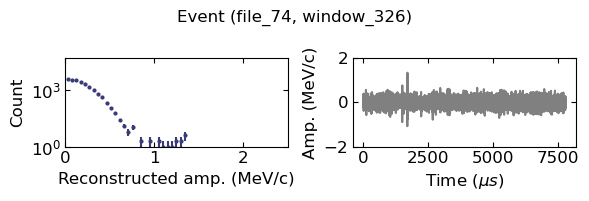

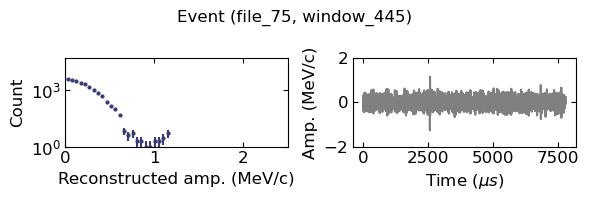

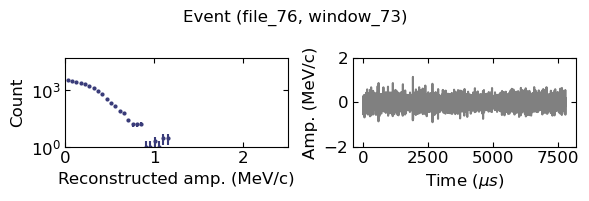

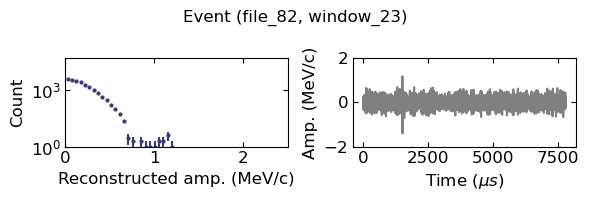

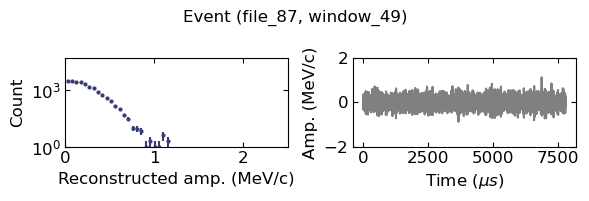

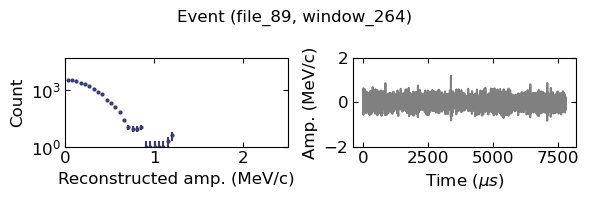

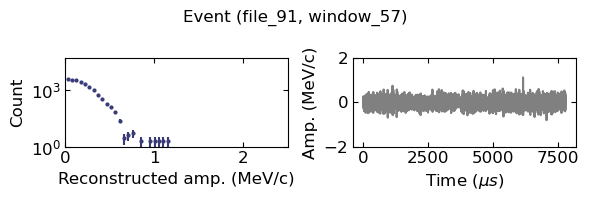

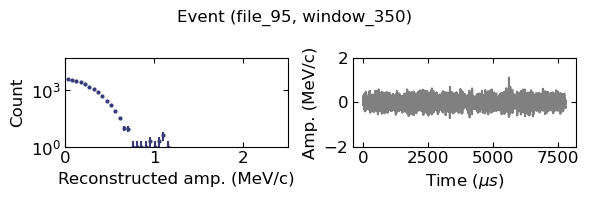

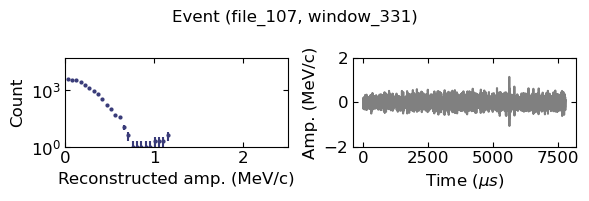

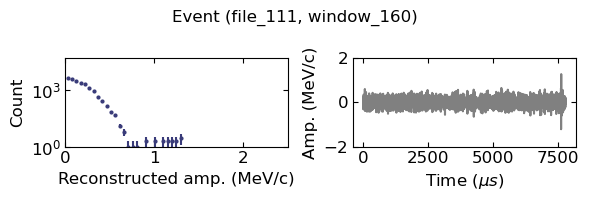

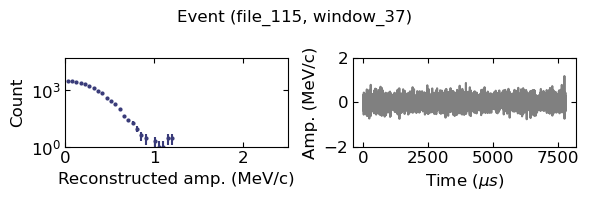

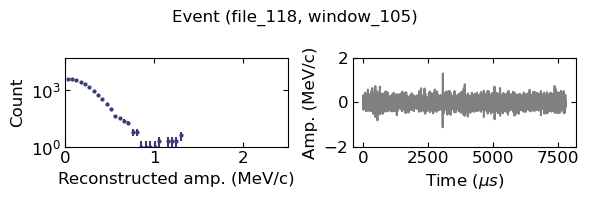

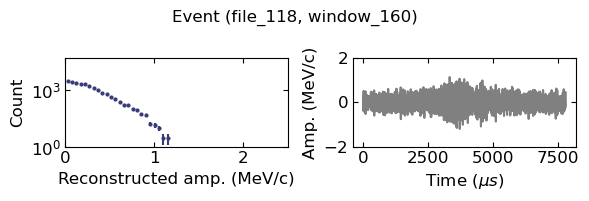

In [417]:
for i, j in cold_events_idx:
    _, _, _, _ = plot_hist_events(i, j)

## Xenon collision

In [454]:
from scipy.special import erf

T = 293
kb = utils.kb
ev2SI = 1 / (utils.SI2ev)
A = 4 * np.pi * (83.5e-9)**2

def fmb(mg, v, T):
    return (4 * np.pi * v**2) * (mg / (2*np.pi*kb*T))**(3/2) * np.exp(-1 * (mg*v**2 / (2*kb*T)))

def xi(x):
    return np.sqrt(np.pi) * x * (1 - 2/(x**2)) * erf(x/2) * np.exp(-x**2 / 8) + 2 * np.exp(-3 * x**2 / 8)

def dgamma_dp(pp_kev, A, mg_amu, p_mbar, alpha):
    pp = pp_kev * 1000 * ev2SI
    mg = mg_amu * 1.660538921e-27
    p_pascal = p_mbar * 100
    ng = p_pascal / (kb * T)
    
    vbar = np.sqrt(kb * T / mg)
    
    rate = (ng * A * pp / (4 * mg**2)) * fmb(mg, pp/(2*mg), T) * (1 - alpha + alpha * xi(pp/(mg*vbar)))
    rate_hz_kev = rate * 1000 * ev2SI  # Hz/keV
    return rate_hz_kev
    

In [585]:
pp_kev = np.linspace(1, 5000, 2000)
dg_dp_xe = dgamma_dp(pp_kev, A, 131.3, 1e-12, 0.2)

In [592]:
dpp_kev = pp_kev[1] - pp_kev[0]
pp_gauss = np.arange(-1000, 1000, dpp_kev)
gauss_smearing = utils.gauss(pp_gauss, 1, 0, 195.4)

dg_dp_xe_smeared = np.convolve(dg_dp_xe, gauss_smearing, 'same') / np.sum(gauss_smearing)

In [593]:
bin_kev = (bc[1] - bc[0]) * amp2kev
norm_factor = (hh_cold.shape[0] * 5 * (40000-1200)/40000 * 4e6) * bin_kev

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_52202/2302339669.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*1000, utils.gauss(xx, *gp)/norm_factor, 'r:', label=f'Gaussian fit, $\sigma$={gp[2]*1000:.1f} keV/c')


Text(0.5, 0, 'Momentum transfer (keV/c)')

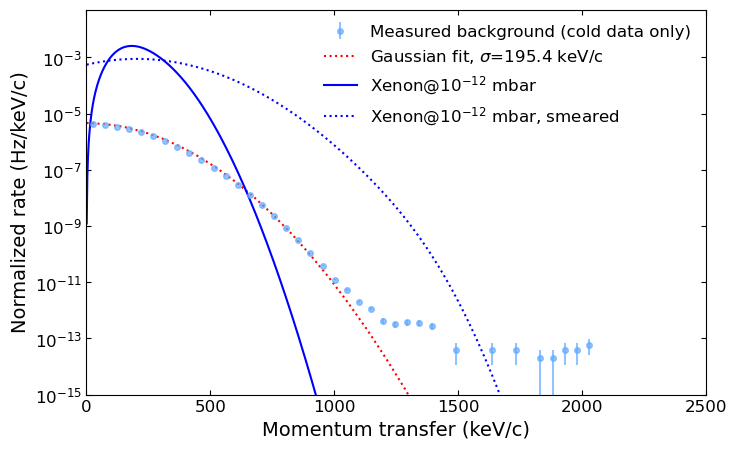

In [607]:
fig, ax = plt.subplots(figsize=(8, 5))

xx = np.linspace(0, 15, 200)

ax.errorbar(bc*amp2kev, hh_cold_sum/norm_factor, np.sqrt(hh_cold_sum)/norm_factor, fmt='o', markersize=4, color=yale_colors[2], label='Measured background (cold data only)', alpha=0.7)
ax.plot(xx*1000, utils.gauss(xx, *gp)/norm_factor, 'r:', label=f'Gaussian fit, $\sigma$={gp[2]*1000:.1f} keV/c')
ax.plot(pp_kev, dg_dp_xe, 'b', label='Xenon@10$^{-12}$ mbar')
ax.plot(pp_kev, dg_dp_xe_smeared, 'b:', label='Xenon@10$^{-12}$ mbar, smeared')

ax.legend(frameon=False)
handles, labels = ax.get_legend_handles_labels()
handles_ordered = [handles[i] for i in [3, 0, 1, 2]]
labels_ordered = [labels[i] for i in [3, 0, 1, 2]]
ax.legend(handles=handles_ordered, labels=labels_ordered, frameon=False)

ax.set_yscale('log')
ax.set_ylim(1e-15, 5e-2)
ax.set_xlim(0, 2500)

ax.set_ylabel('Normalized rate (Hz/keV/c)')
ax.set_xlabel('Momentum transfer (keV/c)')

In [612]:
resolved = pp_kev > 500
print(f'Total resolvable collision rate (threhsold = 500 keV): {np.trapz(dg_dp_xe_smeared[resolved], pp_kev[resolved]):.2e} Hz')

Total resolvable collision rate (threhsold = 500 keV): 3.63e-02 Hz
